# Mount Drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os

# List everything inside My Drive
print("Files/Folders in My Drive:", os.listdir("/content/drive/My Drive"))

# Then check inside 'googlecolab' folder
print("Files/Folders in googlecolab:", os.listdir("/content/drive/My Drive/googlecolab"))

# Then inside 'gnicpl'
print("Files/Folders in gnicpl:", os.listdir("/content/drive/My Drive/googlecolab/gnicpl"))

# Finally inside 'projectone'
print("Files in projectone:", os.listdir("/content/drive/My Drive/googlecolab/gnicpl/projectthree"))

Files/Folders in My Drive: ['Colab Notebooks', 'googlecolab', 'ALL']
Files/Folders in googlecolab: ['Untitled0.ipynb', 'Untitled', 'Copy of Player Data LLM .ipynb', 'Untitled1.ipynb', 'Player Data LLM .ipynb', 'LLM trial 1.ipynb', 'Untitled2.ipynb', 'Untitled3.ipynb', 'Untitled4.ipynb', 'AI Ml in Drug Discovery.ipynb', 'GFG Pyhton study', 'GNCIPL Lecture 1: 18-08-2025.ipynb', 'gnicpl', 'Untitled5.ipynb']
Files/Folders in gnicpl: ['projectone', 'data.csv', 'projecttwo', 'projectthree']
Files in projectone: ['Mall_Customers.csv']


# Load the Data

In [ ]:
import pandas as pd

# Define the file path (make sure capitalization and spelling match exactly)
file_path = "/content/drive/My Drive/googlecolab/gnicpl/projectthree/Mall_Customers.csv"

# Load the Excel file
df = pd.read_csv(file_path)

# Show first 5 rows of data
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# Basic Information

In [ ]:
# Check dataset shape and columns
print(df.shape)
print(df.info())

# Summary statistics
print(df.describe())


(200, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB
None
       CustomerID         Age  Annual Income (k$)  Spending Score (1-100)
count  200.000000  200.000000          200.000000              200.000000
mean   100.500000   38.850000           60.560000               50.200000
std     57.879185   13.969007           26.264721               25.823522
min      1.000000   18.000000           15.000000                1.000000
25%     50.750000   28.750000           41.500000               34.750000
50%    100.500000   36.0

# Check for Missing Values

In [ ]:
print(df.isnull().sum())


CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


# Gender Distribution

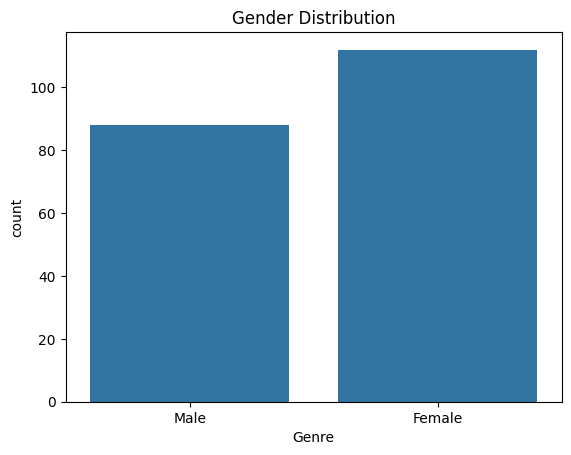

In [ ]:
sns.countplot(x='Genre', data=df)
plt.title('Gender Distribution')
plt.show()


# Age Distribution

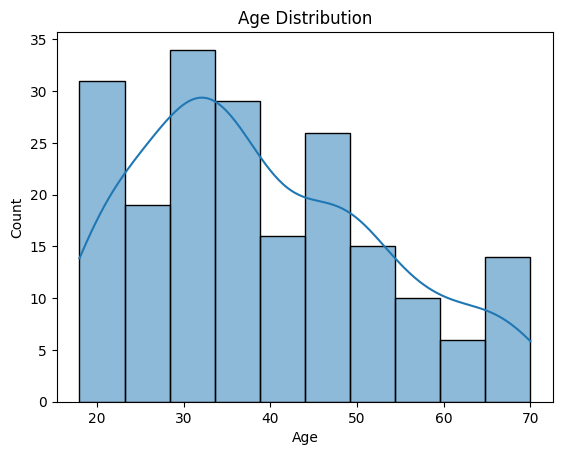

In [ ]:
sns.histplot(df['Age'], bins=10, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.show()


# Annual Income Distribution

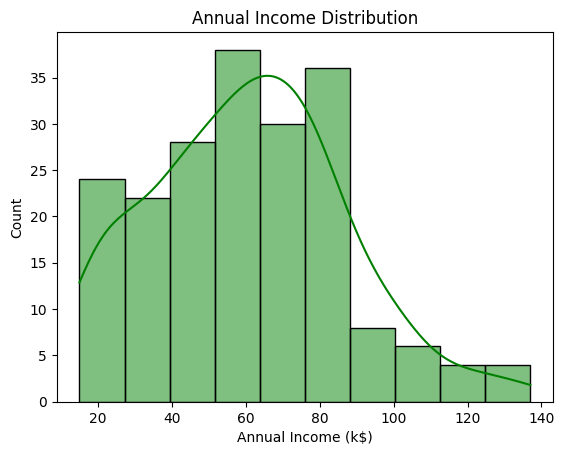

In [ ]:
sns.histplot(df['Annual Income (k$)'], bins=10, kde=True, color='green')
plt.title('Annual Income Distribution')
plt.xlabel('Annual Income (k$)')
plt.show()


# Spending Score Distribution

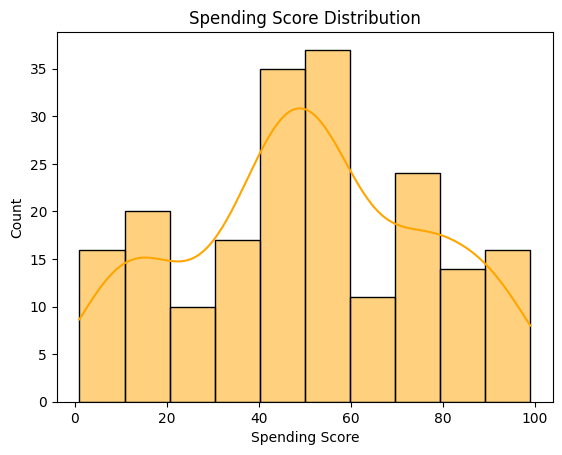

In [ ]:
sns.histplot(df['Spending Score (1-100)'], bins=10, kde=True, color='orange')
plt.title('Spending Score Distribution')
plt.xlabel('Spending Score')
plt.show()


# Income vs Spending Score

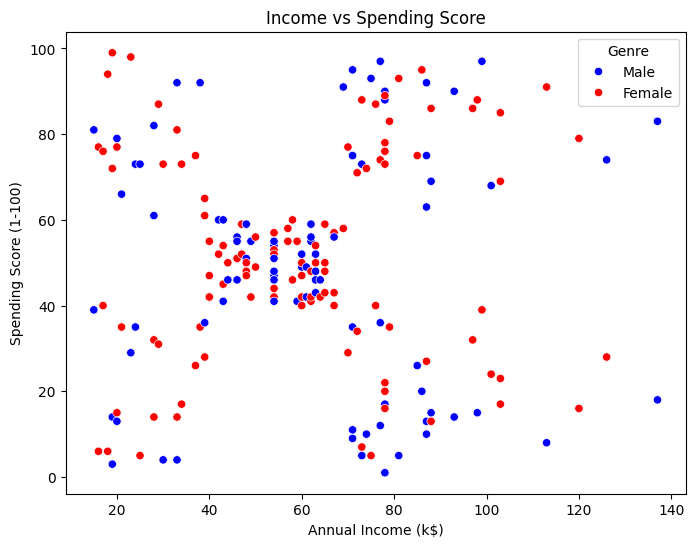

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='Genre', data=df, palette=['blue', 'red'])
plt.title('Income vs Spending Score')
plt.show()


# Age vs Spending Score

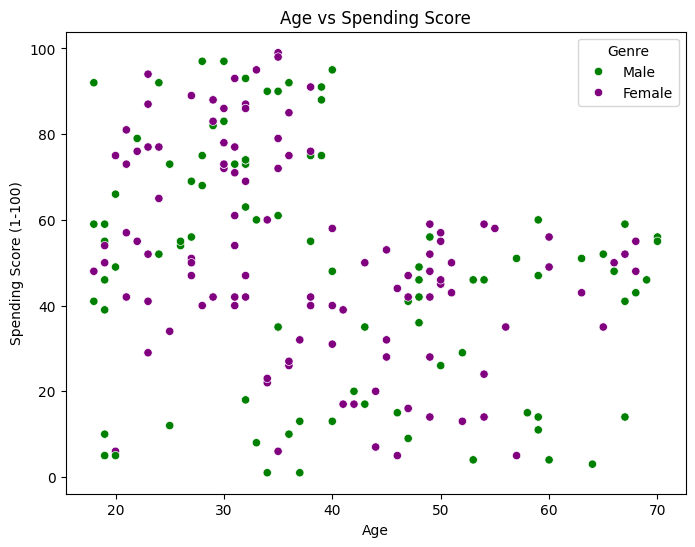

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x='Age', y='Spending Score (1-100)',
                hue='Genre', data=df, palette=['green', 'purple'])
plt.title('Age vs Spending Score')
plt.show()


# Import Libraries

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans


# Select Features for Clustering

In [ ]:
X = df.iloc[:, [3, 4]].values


# Find Optimal Number of Clusters (Elbow Method)

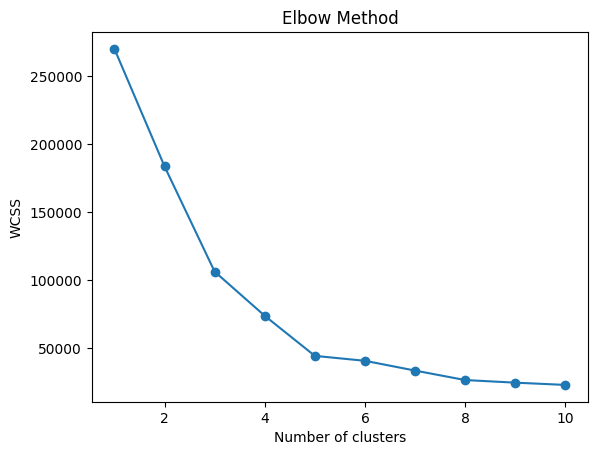

In [ ]:
wcss = []   # within-cluster sum of squares

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()


# Apply K-Means

In [ ]:
kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
y_kmeans = kmeans.fit_predict(X)


# Visualize Clusters

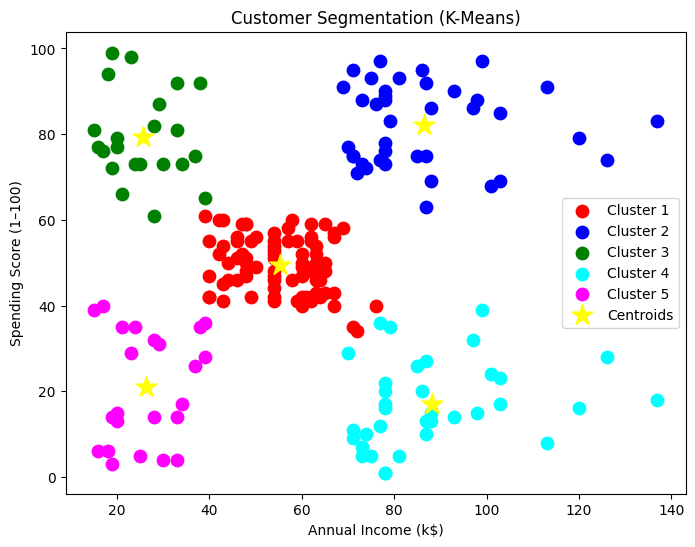

In [ ]:
plt.figure(figsize=(8,6))
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s=80, c='red', label='Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s=80, c='blue', label='Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s=80, c='green', label='Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s=80, c='cyan', label='Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s=80, c='magenta', label='Cluster 5')

# centroids
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1],
            s=250, c='yellow', marker='*', label='Centroids')

plt.title("Customer Segmentation (K-Means)")
plt.xlabel("Annual Income (k$)")
plt.ylabel("Spending Score (1–100)")
plt.legend()
plt.show()
